In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

 * ****1. Exploratory Data Analysis and Data Understanding****

 **Selecting and Loading a Dataset Aligned with UNSDG Using Pandas**

In [3]:
df = pd.read_csv('/content/drive/MyDrive/final_dataset/enhanced_health_data.csv')

**Perform an initial analysis to gather a detailed description of the dataset.**

**1.**   **When and by whom created the dataset?**

  **Answer**: Abhay Ayare created the dataset on July 22, 2024.

**2.** **How did you access to the dataset?**

   **Answer**: I accessed to the dataset by downloading it through a website named Kaggle.

**3.** **How does it align with the chosen UNSDG?**

  **Answer**: The dataset contains health metrics such as blood pressure, cholesterol levels, BMI, and diabetes status. This aligns with UNSDG Goal 3: Good Health and Well-being, which aims to ensure healthy lives and promote well-being for all. The dataset can be used to analyze health trends, identify risk factors, and support healthcare decision-making.

**4.** **List all the attributes (columns) present in the dataset.**

  **Answer**: The attributes (columns) present in a dataset are:

In [4]:
#For Display the first few rows of our datasets
df.head()

,Name,Gender,Age,Systolic BP,Diastolic BP,Cholesterol,Height (cm),Weight (kg),BMI,Smoker,Diabetes,Health
0,Heidi Williamson,Male,35,129,83,188,169.072096,73.796178,25.816062,False,True,Fair
1,Eric Odom,Male,70,133,95,224,154.188610,70.671522,29.726232,False,False,Fair
2,Kelly Thomas,Male,79,149,88,179,197.514897,97.590268,25.015362,True,True,Bad
3,Ann Lara,Female,52,115,76,204,157.223771,82.202776,33.254473,False,False,Fair
4,Tammy Oliver,Male,51,135,82,201,177.370258,57.038726,18.130435,False,False,Fair


In [7]:
#Identify the number of rows and columns in the dataset.
row=len(df.index)
print(f"no of row = {row}.")
columns=len(df.columns)
print(f"no of columns = {columns}.")

no of row = 1000.
no of columns = 12.


In [8]:
#List all the columns and their data types.
print("All the columns and their data types :- ")
print(df.dtypes)

All the columns and their data types :- 
Name             object
Gender           object
Age               int64
Systolic BP       int64
Diastolic BP      int64
Cholesterol       int64
Height (cm)     float64
Weight (kg)     float64
BMI             float64
Smoker             bool
Diabetes           bool
Health           object
dtype: object


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          1000 non-null   object 
 1   Gender        1000 non-null   object 
 2   Age           1000 non-null   int64  
 3   Systolic BP   1000 non-null   int64  
 4   Diastolic BP  1000 non-null   int64  
 5   Cholesterol   1000 non-null   int64  
 6   Height (cm)   1000 non-null   float64
 7   Weight (kg)   1000 non-null   float64
 8   BMI           1000 non-null   float64
 9   Smoker        1000 non-null   bool   
 10  Diabetes      1000 non-null   bool   
 11  Health        1000 non-null   object 
dtypes: bool(2), float64(3), int64(4), object(3)
memory usage: 80.2+ KB
None


In [11]:
#For description of our dataset
df.describe()

,Age,Systolic BP,Diastolic BP,Cholesterol,Height (cm),Weight (kg),BMI
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,48.834000,129.526000,82.879000,187.715000,175.038446,74.941397,24.919168
std,17.980816,9.532061,6.064911,21.091387,14.395461,14.622998,6.290984
min,18.000000,105.000000,65.000000,140.000000,150.087644,50.011915,13.094723
25%,33.000000,123.000000,80.000000,172.000000,162.805812,62.264152,20.162104
50%,49.000000,130.000000,83.000000,187.000000,175.426060,74.808034,24.164326
75%,64.000000,136.000000,87.000000,203.000000,187.827352,87.518363,28.671465
max,80.000000,150.000000,95.000000,239.000000,199.966307,99.954932,43.806649


In [9]:
#check duplicate data
df.duplicated().sum()

0

In [12]:
missing_values = df.isnull().sum()
#for printing result
print(missing_values)

Name            0
Gender          0
Age             0
Systolic BP     0
Diastolic BP    0
Cholesterol     0
Height (cm)     0
Weight (kg)     0
BMI             0
Smoker          0
Diabetes        0
Health          0
dtype: int64


**Exploring Data through visualizations and Charts**

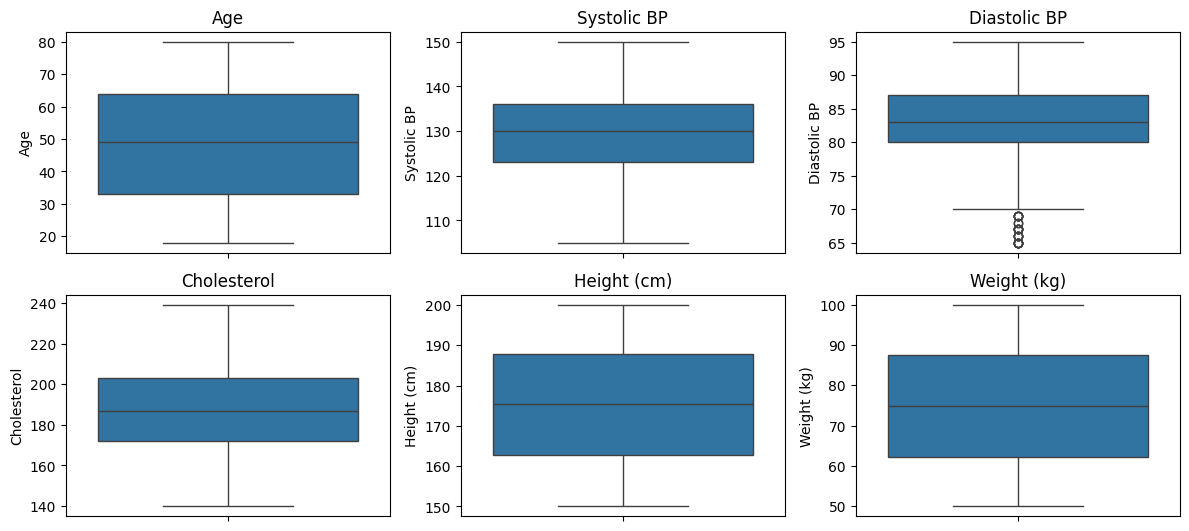

In [17]:
#box plot
num_features =  df[['Age', 'Systolic BP', 'Diastolic BP', 'Cholesterol', 'Height (cm)',
        'Weight (kg)']]

# Creating boxplots for each numerical feature
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_features.columns, 1):  # Use num_features.columns
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

The boxplots display the distribution pattern of different attributes. The Interquartile Range (IQR) technique was applied to handle outliers in both diastolic blood pressure and body mass index (BMI) data for quality assurance purposes. The distributions of other characteristics such as age as well as systolic blood pressure and cholesterol appear to be normal. Some extreme numbers persist in BMI measurements as well as in diastolic blood pressure observations. A combination of these discoveries guides the refinement phase of the dataset before model development for classification purposes.

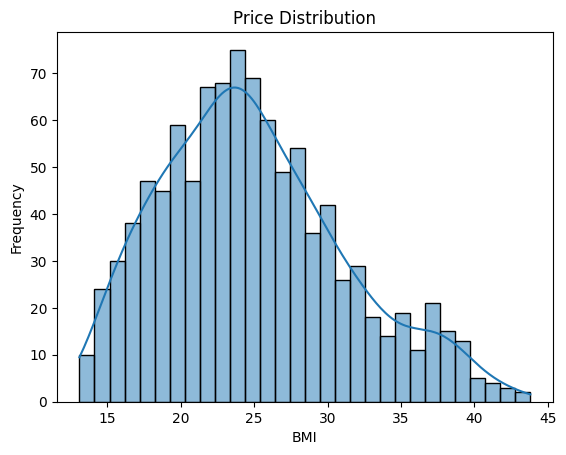

In [14]:
sns.histplot(df["BMI"], bins=30, kde=True)
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.title("Price Distribution")
plt.show()


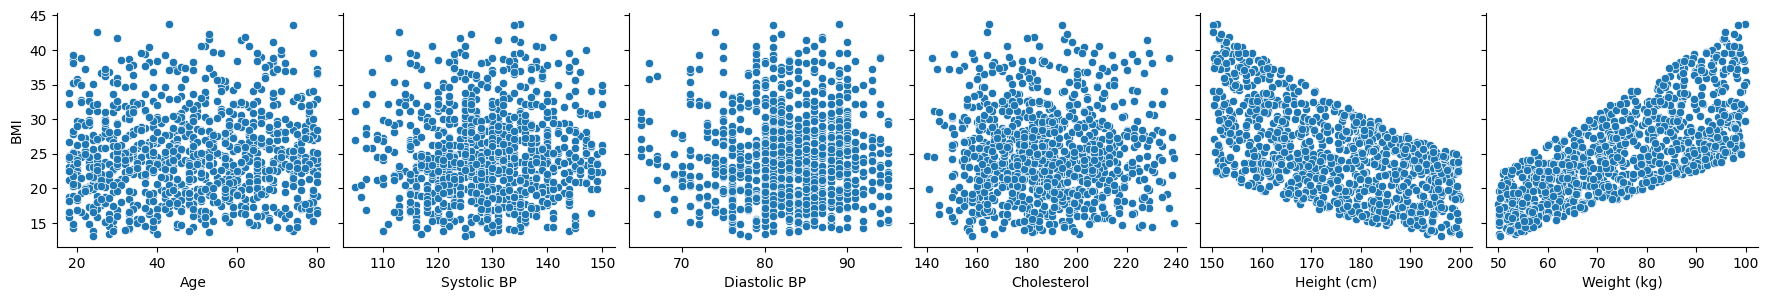

In [22]:
# Create pairplot with regression line
sns.pairplot(df, x_vars=num_features, y_vars=["BMI"], height=3, aspect=1, kind="scatter")

plt.show()

In [25]:
c = df.select_dtypes(include=["number"]).corr()
c

,Age,Systolic BP,Diastolic BP,Cholesterol,Height (cm),Weight (kg),BMI
Age,1.000000,0.659528,0.637553,0.425144,-0.035689,0.025671,0.042237
Systolic BP,0.659528,1.000000,0.607388,0.380679,-0.035520,0.001053,0.025806
Diastolic BP,0.637553,0.607388,1.000000,0.426847,-0.022264,0.006810,0.016307
Cholesterol,0.425144,0.380679,0.426847,1.000000,-0.008001,0.022723,0.019021
Height (cm),-0.035689,-0.035520,-0.022264,-0.008001,1.000000,0.068497,-0.612316
Weight (kg),0.025671,0.001053,0.006810,0.022723,0.068497,1.000000,0.733340
BMI,0.042237,0.025806,0.016307,0.019021,-0.612316,0.733340,1.000000


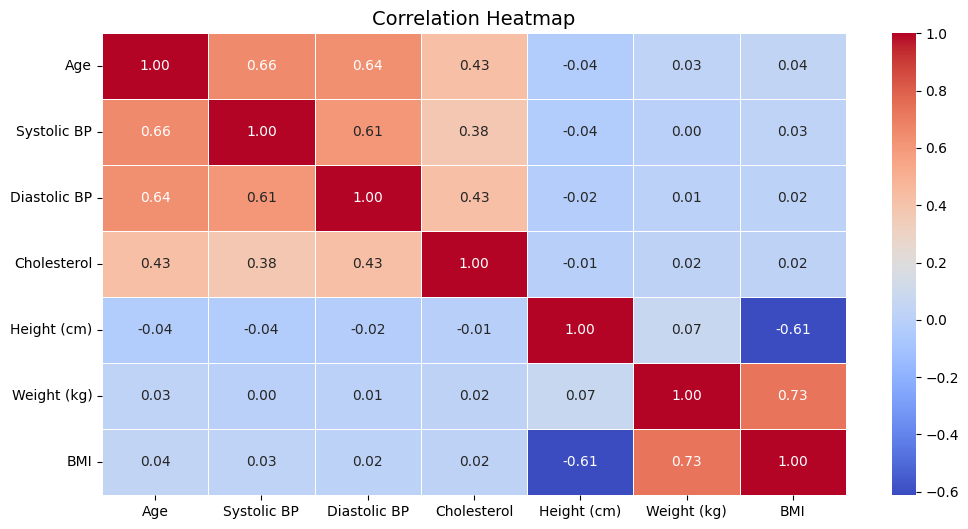

In [26]:
plt.figure(figsize=(12,6))
sns.heatmap(c, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)  # Fix colormap
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

In [29]:
# Define target variable (y)
y = df["BMI"]

# Define features (X) excluding categorical columns
X = df.drop(columns=["Name", "Gender", "Health", "BMI"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler to standardize the features
scaler = StandardScaler()

# Fit and transform the training data, then transform the test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

2. Build a Model from Scratch:

Scratch Model Performance:
 Mean Squared Error (MSE): 0.8726267932247518
 Mean Absolute Error (MAE): 0.7337538180247434
 R-squared (R²): 0.977686038428039


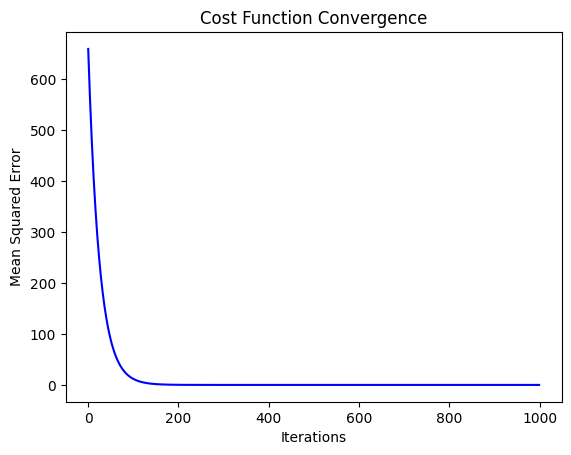

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

class LinearRegressionScratch:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.theta = None
        self.cost_history = []

    def fit(self, X, y):
        m, n = X.shape
        X = np.c_[np.ones(m), X]
        self.theta = np.zeros(n + 1)

        for _ in range(self.iterations):
            y_pred = X @ self.theta
            errors = y_pred - y
            gradients = (2 / m) * X.T @ errors
            self.theta -= self.learning_rate * gradients

            cost = np.mean(errors ** 2)
            self.cost_history.append(cost)

    def predict(self, X):
        X = np.c_[np.ones(X.shape[0]), X]
        return X @ self.theta

    def plot_cost(self):
        """Plot cost function over iterations to check convergence."""
        plt.plot(range(len(self.cost_history)), self.cost_history, color='blue')
        plt.xlabel("Iterations")
        plt.ylabel("Mean Squared Error")
        plt.title("Cost Function Convergence")
        plt.show()



model_scratch = LinearRegressionScratch(learning_rate=0.01, iterations=1000)
model_scratch.fit(X_train_scaled, y_train)


y_pred_scratch = model_scratch.predict(X_test_scaled)


mse_scratch = mean_squared_error(y_test, y_pred_scratch)
mae_scratch = mean_absolute_error(y_test, y_pred_scratch)
r2_scratch = r2_score(y_test, y_pred_scratch)

print("Scratch Model Performance:")
print(f" Mean Squared Error (MSE): {mse_scratch}")
print(f" Mean Absolute Error (MAE): {mae_scratch}")
print(f" R-squared (R²): {r2_scratch}")


model_scratch.plot_cost()


3. Build a Primary Model:

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Initialize the model
model1 = LinearRegression()

# Fit the model to the scaled training data
model1.fit(X_train, y_train)

# Predict on the test set
y_pred = model1.predict(X_test)

# Calculate performance metrics
mse_lr= mean_squared_error(y_test, y_pred)
r2_lr= r2_score(y_test, y_pred)
mae_lr = mean_absolute_error(y_test, y_pred)

print("Linear Regression:")
print(f"Mean Squared Error: {mse_lr:.4f}")
print(f"R-squared: {r2_lr:.4f}")
print(f"Mean Absolute Error: {mae_lr:.4f}")


Linear Regression:
Mean Squared Error: 0.8727
R-squared: 0.9777
Mean Absolute Error: 0.7338


In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


model2 = RandomForestRegressor(n_estimators=100, random_state=42)


model2.fit(X_train, y_train)

y_pred_rf = model2.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

# Print performance metrics
print("Random Forest Regression:")
print(f"Mean Squared Error: {mse_rf:.4f}")
print(f"R-squared: {r2_rf:.4f}")
print(f"Mean Absolute Error: {mae_rf:.4f}")


Random Forest Regression:
Mean Squared Error: 0.1210
R-squared: 0.9969
Mean Absolute Error: 0.2433


In [34]:
# Compare the models based on R-squared, MSE, and MAE
if r2_rf > r2_lr:
    print("Random Forest Regressor performed better based on R-squared value.")
else:
    print("Linear Regression performed better based on R-squared value.")

if mse_rf < mse_lr:
    print("Random Forest Regressor performed better based on Mean Squared Error.")
else:
    print("Linear Regression performed better based on Mean Squared Error.")

if mae_rf < mae_lr:
    print("Random Forest Regressor performed better based on Mean Absolute Error.")
else:
    print("Linear Regression performed better based on Mean Absolute Error.")


Random Forest Regressor performed better based on R-squared value.
Random Forest Regressor performed better based on Mean Squared Error.
Random Forest Regressor performed better based on Mean Absolute Error.


4. Hyper-parameter Optimization with Cross-Validation:

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Hyperparameters for Linear Regression (Ridge is used for regularization)
param_grid_linear = {'alpha': [0.001, 0.01, 0.1, 1, 10, 50, 100, 500]}

# Use Ridge Regression as it allows regularization
ridge_model = Ridge()

# Perform GridSearchCV
grid_search_linear = GridSearchCV(estimator=ridge_model, param_grid=param_grid_linear, cv=5, scoring='r2')
grid_search_linear.fit(X_train, y_train)

# Best hyperparameters for Linear Regression
best_params_linear = grid_search_linear.best_params_
print("Best hyperparameters for Linear Regression (Ridge):", best_params_linear)

Best hyperparameters for Linear Regression (Ridge): {'alpha': 500}


In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],  # Corrected
    'bootstrap': [True, False]
}

# Instantiate model
rf = RandomForestRegressor(random_state=42)

# Perform RandomizedSearchCV
rf_cv = RandomizedSearchCV(rf, rf_params, cv=5, n_iter=10, scoring='r2', random_state=42)
rf_cv.fit(X_train, y_train)

# Best hyperparameters
print("Best Random Forest Parameters:", rf_cv.best_params_)


Best Random Forest Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 20, 'bootstrap': True}


5. Feature Selection :

In [37]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Initialize model
lr_model = LinearRegression()

# Perform RFE to select the top 5 features
rfe = RFE(estimator=lr_model, n_features_to_select=4)
rfe.fit(X, y)

# Get selected feature names
selected_features = X.columns[rfe.support_]

print("Selected Features Linear Regression:", list(selected_features))


Selected Features Linear Regression: ['Height (cm)', 'Weight (kg)', 'Smoker', 'Diabetes']


In [38]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Get feature importance scores
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Select top 5 features
selected_features = feature_importance.head(4).index.tolist()

print("Selected Features for Random Forest model:", selected_features)


Selected Features for Random Forest model: ['Weight (kg)', 'Height (cm)', 'Cholesterol', 'Age']


6. Final Model:

In [41]:
# using best  features and target variable for linear regression
features = ["Age", "Systolic BP", "Diastolic BP", "Cholesterol", "Height (cm)", "Weight (kg)", "Smoker", "Diabetes"]
X = df[features]
y = df["BMI"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a standard Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_model.predict(X_test)

# Evaluate the model using R², RMSE, and MAE
r2_lr_final = r2_score(y_test, y_pred)
mse_lr_final = mean_squared_error(y_test, y_pred)
mae_lr_final = mean_absolute_error(y_test, y_pred)

# Print evaluation results
print("Final Linear Regression Results:")
print(f"R² Score: {r2_lr_final:.4f}")
print(f"Mean Squared Error (RMSE): {mse_lr_final:.4f}")
print(f"Mean Absolute Error (MAE): {mae_lr_final:.4f}")


Final Linear Regression Results:
R² Score: 0.9777
Mean Squared Error (RMSE): 0.8727
Mean Absolute Error (MAE): 0.7338


In [42]:
print("Linear Regression Result:")
if r2_lr_final > r2_lr:
    print(f"R² improved from {r2_lr:.4f} to {r2_lr_final:.4f}")
else:
    print(f"R² worsened from {r2_lr:.4f} to {r2_lr_final:.4f}")


if mse_lr_final < mse_lr:
    print(f"MSE improved from {mse_lr:.4f} to {mse_lr_final:.4f}")
else:
    print(f"MSE worsened from {mse_lr:.4f} to {mse_lr_final:.4f}")


if mae_lr_final < mae_lr:
    print(f"MAE improved from {mae_lr:.4f} to {mae_lr_final:.4f}")
else:
    print(f"MAE worsened from {mae_lr:.4f} to {mae_lr_final:.4f}")

Linear Regression Result:
R² worsened from 0.9777 to 0.9777
MSE worsened from 0.8727 to 0.8727
MAE worsened from 0.7338 to 0.7338


In [45]:
# using best  features and target variable for Random Forest Regressor
features = ["Age", "Systolic BP", "Diastolic BP", "Cholesterol", "Height (cm)", "Weight (kg)", "Smoker", "Diabetes"]
X = df[features]
y=df["BMI"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(
    n_estimators=50,
    min_samples_split=10,
    min_samples_leaf=2,
    max_features=None,
    max_depth=20,
    bootstrap=True,
    random_state=42
)

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
mse_rf_final = mean_squared_error(y_test, y_pred)
mae_rf_final = mean_absolute_error(y_test, y_pred)
r2_rf_final = r2_score(y_test, y_pred)

# Print final Random Forest model results
print("Final Random Forest Regressor:")
print("Mean Squared Error (MSE):", mse_rf_final)
print("Mean Absolute Error (MAE):", mae_rf_final)
print("R-squared (R2):", r2_rf_final)

Final Random Forest Regressor:
Mean Squared Error (MSE): 0.20978733448779935
Mean Absolute Error (MAE): 0.3144080002830153
R-squared (R2): 0.9946355228187004


In [46]:
print("Random Forest Regressor:")
if r2_rf_final > r2_rf:
    print(f"R² improved from {r2_rf:.4f} to {r2_rf_final:.4f}")
else:
    print(f"R² worsened from {r2_rf:.4f} to {r2_rf_final:.4f}")

if mse_rf_final < mse_rf:
    print(f"MSE improved from {mse_rf:.4f} to {mse_rf_final:.4f}")
else:
    print(f"MSE worsened from {mse_rf:.4f} to {mse_rf_final:.4f}")


if mae_rf_final < mae_rf:
    print(f"MAE improved from {mae_rf:.4f} to {mae_rf_final:.4f}")
else:
    print(f"MAE worsened from {mae_rf:.4f} to {mae_rf_final:.4f}")

Random Forest Regressor:
R² worsened from 0.9969 to 0.9946
MSE worsened from 0.1210 to 0.2098
MAE worsened from 0.2433 to 0.3144


7. Conclusion: